In [2]:
import pandas as pd
import re
import numpy as np
from matplotlib import pyplot as plt
import nltk 
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize as sentence2words
from nltk.tokenize import sent_tokenize as paragraph2sentence
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
stopWords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
reviews=pd.read_csv('/content/drive/MyDrive/NlpExam/reviews.csv')

In [4]:
reviews.head()

,reviews.rating,reviews.text
0,1,This product so far has not disappointed. My c...
1,1,great for beginner or experienced person. Boug...
2,1,Inexpensive tablet for him to use and learn on...
3,1,I've had my Fire HD 8 two weeks now and I love...
4,1,I bought this for my grand daughter when she c...


In [5]:
reviews.columns=['rating','text']

In [6]:
reviews.head

<bound method NDFrame.head of        rating                                               text
0           1  This product so far has not disappointed. My c...
1           1  great for beginner or experienced person. Boug...
2           1  Inexpensive tablet for him to use and learn on...
3           1  I've had my Fire HD 8 two weeks now and I love...
4           1  I bought this for my grand daughter when she c...
...       ...                                                ...
34654       1  This is not appreciably faster than any other ...
34655       0  Amazon should include this charger with the Ki...
34656       0  Love my Kindle Fire but I am really disappoint...
34657       0  I was surprised to find it did not come with a...
34658       0  to spite the fact that i have nothing but good...

[34659 rows x 2 columns]>

In [7]:
# making sure if the text of the reviews have any emotions, hyperlinks , or mentions which would be not important for the classifier so i will get rid or it 
# a functions to get rid of the mentioned staff.
def cleaning_unnecessary_staff(text):
    assert isinstance(text,str)
    emotions = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
              ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
              ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
              ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
              '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
              '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
              ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

    hyperlinks_regex = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"

    mention_regex = r"@[^\s]+"

    specialchar_regex = '[^a-zA-Z0-9]'



    text = text.lower() # lowercasing.
    
    text = re.sub(hyperlinks_regex,'',text) #Removing hyperlinks.
    
    text = re.sub(mention_regex, '', text) #Removing mentions.
    
    text = re.sub(specialchar_regex, " ", text)     #Replacing the characters other than alphabets and digits.
    
    
    
    
    for em in emotions.keys():
        text = text.replace(em, emotions[em])    #Replacing the emotions with expressive words.

    text = ' '.join([word for word in text.split() if word not in stopWords])
    
    return text

In [8]:
import copy
reviews_new=copy.deepcopy(reviews)

In [9]:
reviews_new.text=reviews_new.text.apply(cleaning_unnecessary_staff)

In [10]:
print(reviews_new.iloc[2000,1])
print(reviews.iloc[2000,1])

purchased 9 year old play games watch movies read set extremely impressed quality got price processor fast enough games run smoothly setup breeze sturdy great lower price tablet anyone looking nice tablet extremely affordable price
This was purchased for my 9 year-old to play games, watch movies, and read on. When we set it up, I was extremely impressed with the quality that we got for the price! It's processor is fast enough so that his games run smoothly. Setup was a breeze, and it's very sturdy. This is a great lower price tablet for anyone looking to own a nice tablet for an extremely affordable price.


In [11]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [12]:
# lemmatize the text
lemm_obj=WordNetLemmatizer()
def lemm_text(text):

  assert isinstance(text,str)
  #lemm_obj=WordNetLemmatizer()
  text_list=sentence2words(text)
  new_text=' '.join([ lemm_obj.lemmatize(word) for word in text_list])
  return new_text

In [13]:
reviews_new.text=reviews_new.text.apply(lemm_text)

In [76]:
reviews_new['rating'].replace({0: -1}, inplace=True)

In [77]:
reviews_new.describe()

,rating
count,34659.000000
mean,0.953143
std,0.302523
min,-1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [78]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

matrix = vectorizer.fit_transform(reviews_new.text)
matrix

<34659x12428 sparse matrix of type '<class 'numpy.int64'>'
	with 480110 stored elements in Compressed Sparse Row format>

In [47]:
from sklearn.model_selection import train_test_split
import joblib
from sklearn.feature_extraction.text import CountVectorizer

In [48]:
x = reviews_new.text
y = reviews_new.rating
x, x_test, y, y_test = train_test_split(x,y, stratify=y, test_size=0.25, random_state=42)

In [49]:
# Vectorize text reviews to numbers
vec = CountVectorizer(max_features=1000, binary=True)
x = vec.fit_transform(x).toarray()
x_test = vec.transform(x_test).toarray()

In [50]:
#Model Generation
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

model = MultinomialNB()
model.fit(x, y)

MultinomialNB()

In [51]:
#testing
model.score(x_test, y_test)

0.9621465666474321

In [52]:
#testing with a sentence 
model.predict(vec.transform([ "i Bought this around black friday for $60 hoping it would be awesome... it failed so hard i tried multiple different micro SD cards none of which were recognized and YES i formated them with every format i could think of ... Fat32, NTFS, Fat, Xfat... i even tried to have the tablet do it... didnt work... to make matters worse half the apps i wanted to use werent in the app store and i came to find out that it isnt linked to the normal google play store this tablet has its own app store which is missing many common apps... the main reason i bought this was to play clash of clans and i cant because it wasnt on the app store... i tried to also use aftermarket play stores to play COC but it didnt work... launched and played 1 time but didnt work or update after that... needless to say i returned it and bought a $250 samsung galaxy tab A 10.1 (2016 version) with S-pen and its WAYYYYY better... bottom line you get what you pay for... also hint the s-pen version has an extra 1 GB of ram over the non pen version... so you should get that if you can afford the extra $50..."]))[0]

0

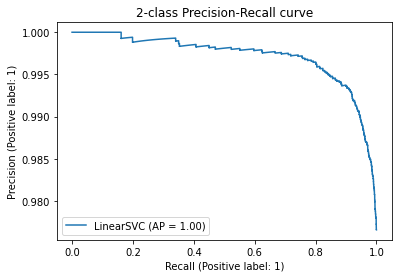

In [53]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    model, x_test, y_test, name="LinearSVC"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [54]:
y_pred=model.predict(x_test)

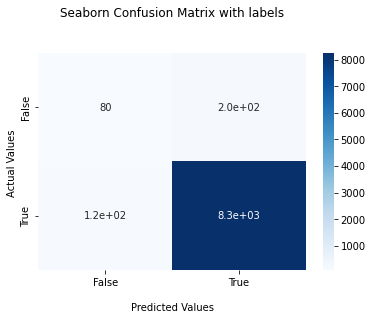

In [56]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf_matrix = confusion_matrix(y_pred, y_test)
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [57]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
print("f1 score",f1_score(y_pred, y_test))
print("precesion: ",precision_score(y_pred, y_test))
print("accuracy", accuracy_score(y_pred, y_test))

f1 score 0.9805248782804893
precesion:  0.9757740486882533
accuracy 0.9621465666474321


In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.utils.np_utils import to_categorical

In [18]:
max_features = 2000    
Token = Tokenizer(num_words = max_features, split = ' ')  
Token.fit_on_texts(reviews_new['text'].values)   
X = pad_sequences(Token.texts_to_sequences(reviews_new['text'].values)) 

In [19]:
T_trainval, T_test, S_trainval, S_test = train_test_split(X, reviews_new['rating'].values, test_size=0.2, random_state = 42)
T_train, T_val, S_train, S_val = train_test_split(T_trainval, S_trainval, test_size=0.25, random_state = 42)

In [20]:
#The numpy arrays with which the test and train subsets are represented are converted to tensors, as follows.
import tensorflow as tf
T_train = tf.convert_to_tensor(T_train, dtype=tf.int64)
S_train = tf.convert_to_tensor(S_train, dtype=tf.int64)

T_test = tf.convert_to_tensor(T_test, dtype=tf.int64)
S_test = tf.convert_to_tensor(S_test, dtype=tf.int64)

In [21]:
#Create the LSTM Model:
embd_dimension = 256
LSTM_output = 196

model = Sequential()
model.add(Embedding(max_features, embd_dimension, input_length = X.shape[1]))
model.add(SpatialDropout1D(0.46))
model.add(LSTM(LSTM_output, dropout = 0.3, recurrent_dropout = 0.3))
model.add(Dense(2, activation = 'sigmoid'))
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 895, 256)          512000    
                                                                 
 spatial_dropout1d (SpatialD  (None, 895, 256)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 196)               355152    
                                                                 
 dense (Dense)               (None, 2)                 394       
                                                                 
Total params: 867,546
Trainable params: 867,546
Non-trainable params: 0
_________________________________________________________________
None


In [22]:
#Training the Model:
model.fit(T_train, S_train, epochs = 5, batch_size = 260)

Epoch 1/5
80/80 [==============================] - 320s 4s/step - loss: 0.1376 - accuracy: 0.9720
Epoch 2/5
80/80 [==============================] - 344s 4s/step - loss: 0.0861 - accuracy: 0.9775
Epoch 3/5
80/80 [==============================] - 314s 4s/step - loss: 0.0566 - accuracy: 0.9820
Epoch 4/5
80/80 [==============================] - 305s 4s/step - loss: 0.0491 - accuracy: 0.9841
Epoch 5/5
80/80 [==============================] - 366s 5s/step - loss: 0.0410 - accuracy: 0.9869


In [23]:
#evaluation
test_loss, accuracy = model.evaluate(T_test, S_test, batch_size = 64)
print("Test Loss: {}".format(test_loss))
print("Accuracy: {}".format(accuracy))

109/109 [==============================] - 30s 275ms/step - loss: 0.0976 - accuracy: 0.9746
Test Loss: 0.0975528284907341
Accuracy: 0.9746105074882507
